In [85]:
import pandas as pd
sac = pd.read_csv('datasets/Sacramentorealestatetransactions.csv')
sac.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [86]:
sac['sq__ft'].min()


0

In [87]:
sac['sq__ft'] = sac['sq__ft'].astype(float)
sac['beds'] = sac['beds'].astype(float)
sac['baths'] = sac['baths'].astype(float)
sac['price'] = sac['price'].astype(float)

In [88]:
sac2 = sac.drop(sac[sac['sq__ft'] == 0].index)


In [89]:
sac2 = sac2.reset_index(drop=True)

In [90]:
min_valai = sac2['beds'].min()
max_valai = sac2['beds'].max()

def min_max(x):
    return (x-min_valai)/(max_valai-min_valai)
sac2['beds'] = sac2['beds'].apply(min_max)

In [91]:
min_valai = sac2['baths'].min()
max_valai = sac2['baths'].max()

def min_max(x):
    return (x-min_valai)/(max_valai-min_valai)
sac2['baths'] = sac2['baths'].apply(min_max)

In [92]:
min_valai = sac2['sq__ft'].min()
max_valai = sac2['sq__ft'].max()

def min_max(x):
    return (x-min_valai)/(max_valai-min_valai)
sac2['sq__ft'] = sac2['sq__ft'].apply(min_max)

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-poster')
%matplotlib inline

In [94]:
columns = ['beds', 'baths', 'sq__ft', 'price']
sac3 = sac2.loc[:, columns]

In [95]:
sac3.head()

,beds,baths,sq__ft,price
0,0.142857,0.0,0.065942,59222.0
1,0.285714,0.0,0.127951,68212.0
2,0.142857,0.0,0.058449,68880.0
3,0.142857,0.0,0.068940,69307.0
4,0.142857,0.0,0.058636,81900.0


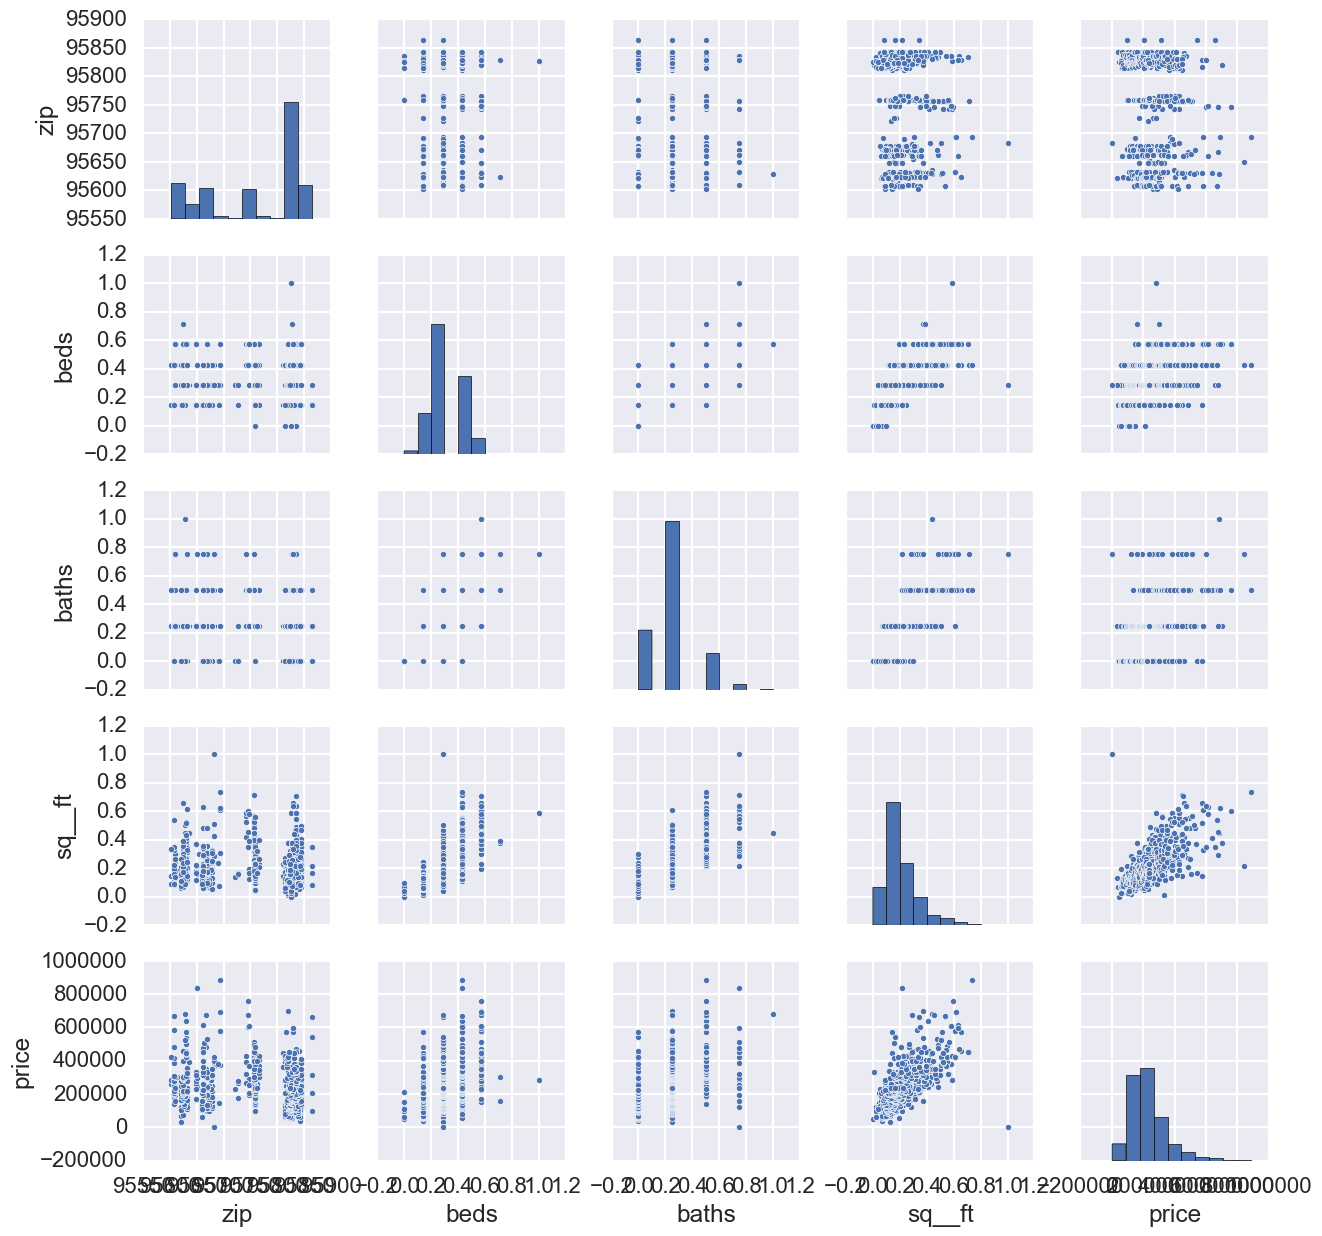

In [96]:
sns.pairplot(sac2, vars = ['zip', 'beds', 'baths', 'sq__ft', 'price'])

**Exercise:**

1. Create a linear regression model using scikit - learn (ridge regression for example) that predicts the housing price (Maybe ST, WAY or DR has an impact in the value?). Discuss the features you are using. Which ones do you need to categorize? 
2. Use Cross Validation to find the best regularization constant.
3. Look up sklearn.preprocessing.PolynomialFeatures and use the method to generate ridge regression models with various polynomial degrees. Use cross validation to find the best degree.

In [97]:
ws = sac2.loc[:, ['beds', 'baths', 'sq__ft']]

In [98]:
from sklearn import linear_model as lm
ridgeReg = lm.Ridge()
ridgeReg.fit( ws, sac2['price'])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [106]:
sac3.iloc[1]

beds          0.285714
baths         0.000000
sq__ft        0.127951
price     68212.000000
Name: 1, dtype: float64

In [104]:
ridgeReg.predict(sac3.iloc[1][:-1].values)


/Users/johnnosal/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 170756.55552068])

In [108]:
import sklearn.cross_validation as cv
scores = cv.cross_val_score(ridgeReg, ws, sac2['price'], cv=10)
print('The Average Accuracy is {0: .2f}'. format(np.average(scores)))

The Average Accuracy is -0.47
